In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

%matplotlib inline

In [4]:
def find_nonzero_runs(sequence):
    seq = np.asarray(sequence, dtype=np.bool)
    assert (seq.ndim == 1)
    nonzeros, = np.nonzero(seq)
    run_start_idx = np.ones_like(nonzeros, dtype=np.bool)
    run_stop_idx  = np.ones_like(nonzeros, dtype=np.bool)
    # shift and subtract to find gaps:
    shifts = ((nonzeros[1:] - nonzeros[:-1])>1)
    run_start_idx[1:] = shifts
    run_stop_idx[:-1] = shifts
    # return starts, and length
    run_start = nonzeros[run_start_idx]
    run_stop  = nonzeros[run_stop_idx]
    run_lengths = run_stop - run_start + 1
    # returning ...
    return run_start, run_lengths


def transform_bed(df,value_id=3,value_threhsold=-0.000001):
    """
    feed one chromosome at a time in here.
    """
    strt,lens = find_nonzero_runs(df[value_id]<value_threhsold)
    stps = strt + lens-1
    ins_starts = df[1].iloc[strt].values
    ins_stops = df[2].iloc[stps].values
    ins_chr1 = df[0].iloc[strt].values
    ins_chr2 = df[0].iloc[stps].values
    assert (ins_chr1 == ins_chr2).all()
    return pd.DataFrame({"chrom":ins_chr1,"start":ins_starts,"stop":ins_stops})
    
    
    
def transform_bed_genome(df,chrom_id=0):
    chroms = df[chrom_id].unique()
    df_chr_tr = []
    for chrom in chroms:
        df_chr = df[df[chrom_id]==chrom]
        df_chr_tr.append(transform_bed(df_chr))
    return pd.concat(df_chr_tr)
        
      


In [5]:
ls


Count_inspot_runs.ipynb
U54-ESC4DN-FA-DpnII-2017524-R1.inspot.tab
U54-ESC4DN-FA-DpnII-2017524-R1.inspot.tab.bed
U54-ESC4DN-FA-DpnII-2017524-R1-R2.inspot.tab
U54-ESC4DN-FA-DpnII-2017524-R1-R2.inspot.tab.bed
U54-ESC4DN-FA-DpnII-2017524-R2.inspot.tab
U54-ESC4DN-FA-DpnII-2017524-R2.inspot.tab.bed
U54-HFFc6-p17-FA-DpnII-20170327_hg38.inspot.tab
U54-HFFc6-p17-FA-DpnII-20170327_hg38.inspot.tab.bed
U54-HFFc6-p17-p22-FA-DpnII-20170327_hg38.inspot.tab
U54-HFFc6-p17-p22-FA-DpnII-20170327_hg38.inspot.tab.bed
U54-HFFc6-p22-FA-DpnII-20170327_hg38.inspot.tab
U54-HFFc6-p22-FA-DpnII-20170327_hg38.inspot.tab.bed


In [6]:
t1 = 'U54-ESC4DN-FA-DpnII-2017524-R1.inspot.tab'
t12 = 'U54-ESC4DN-FA-DpnII-2017524-R1-R2.inspot.tab'
t2 = 'U54-ESC4DN-FA-DpnII-2017524-R2.inspot.tab'


f1 = 'U54-HFFc6-p17-FA-DpnII-20170327_hg38.inspot.tab'
f2 = 'U54-HFFc6-p22-FA-DpnII-20170327_hg38.inspot.tab'
f12 = 'U54-HFFc6-p17-p22-FA-DpnII-20170327_hg38.inspot.tab'

fs = [f1,f2,f12]

for f in fs:
    df = pd.read_table(f,header=None)
    transform_bed_genome(df).to_csv(f+'.bed',sep='\t',header=None,index=None)

    
ts = [t1,t2,t12]

for t in ts:
    df = pd.read_table(t,header=None)
    transform_bed_genome(df).to_csv(t+'.bed',sep='\t',header=None,index=None)




In [61]:
dt1 = pd.read_table(t1,header=None,names=['chrom','start','end','val'])
dt2 = pd.read_table(t2,header=None,names=['chrom','start','end','val'])
dt12 = pd.read_table(t12,header=None,names=['chrom','start','end','val'])
df1 = pd.read_table(f1,header=None,names=['chrom','start','end','val'])
df2 = pd.read_table(f2,header=None,names=['chrom','start','end','val'])
df12 = pd.read_table(f12,header=None,names=['chrom','start','end','val'])



In [8]:
dias1 = "../diamond-insulation/U54-ESC4DN-FA-DpnII-2017524-R1.diamond_ins.bg"
dias12 = "../diamond-insulation/U54-ESC4DN-FA-DpnII-2017524-R1-R2.diamond_ins.bg"
dias2 = "../diamond-insulation/U54-ESC4DN-FA-DpnII-2017524-R2.diamond_ins.bg"

diah1 = "../diamond-insulation/U54-HFFc6-p17-FA-DpnII-20170327_hg38.diamond_ins.bg"
diah12 = "../diamond-insulation/U54-HFFc6-p17-p22-FA-DpnII-20170327_hg38.diamond_ins.bg"
diah2 = "../diamond-insulation/U54-HFFc6-p22-FA-DpnII-20170327_hg38.diamond_ins.bg"

In [65]:
ds1 = pd.read_table(dias1,header=None,names=['chrom','start','end','val'])
ds12 = pd.read_table(dias12,header=None,names=['chrom','start','end','val'])
ds2 = pd.read_table(dias2,header=None,names=['chrom','start','end','val'])
dh1 = pd.read_table(diah1,header=None,names=['chrom','start','end','val'])
dh12 = pd.read_table(diah12,header=None,names=['chrom','start','end','val'])
dh2 = pd.read_table(diah2,header=None,names=['chrom','start','end','val'])



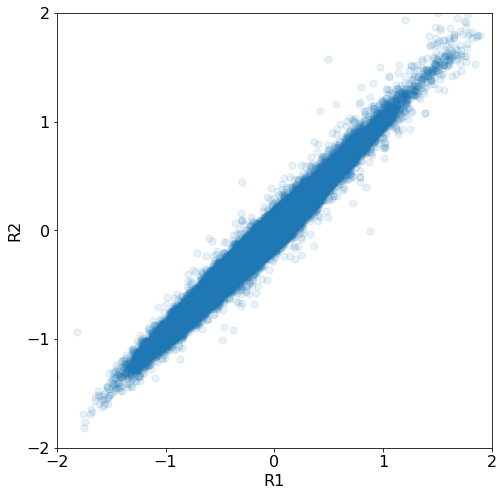

In [35]:
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
# plt.scatter(df1['val'],df2['val'],alpha=0.1,s=25,edgecolor='steelblue',facecolor='none')
plt.scatter(ds1['val'],ds2['val'],alpha=0.1,s=50)#,c='darkred')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.set_aspect(1)
fig = plt.gcf()
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
# ax.xaxis.set_tick_params(fontsize=16)
# ax.set_title("diamond insulation, H1-ESC")
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.set_xlabel('R1',fontsize=16)
ax.set_ylabel('R2',fontsize=16)
fig.set_size_inches(8,8)


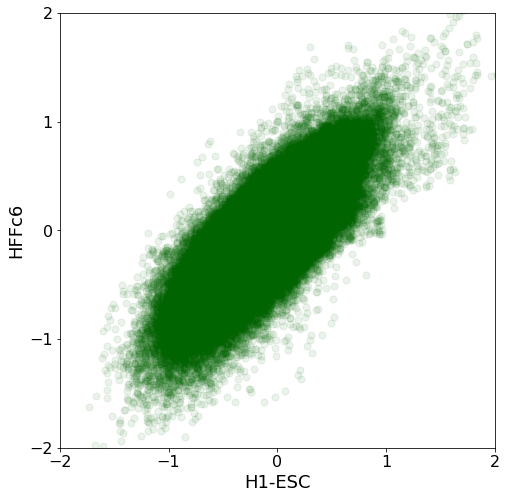

In [69]:
loc = plticker.MultipleLocator(base=1.) # this locator puts ticks at regular intervals
# plt.scatter(df1['val'],df2['val'],alpha=0.1,s=25,edgecolor='steelblue',facecolor='none')
plt.scatter(ds12['val'],dh12['val'],alpha=0.08,s=50,color='darkgreen')
# idxs = (np.abs(fr)>0.4)
# plt.scatter(ds2['val'][idxs],dh2['val'][idxs],alpha=0.1,s=30)
ax = plt.gca()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_aspect(1)
fig = plt.gcf()
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
# ax.set_title("diamond insulation, HFFc6 vs ESC")
ax.set_xlabel('H1-ESC',fontsize=18)
ax.set_ylabel('HFFc6',fontsize=18)
fig.set_size_inches(8,8)


In [70]:
# fr = (np.abs(ds2['val'])-np.abs(dh2['val']))/(np.abs(ds2['val'])+np.abs(dh2['val']))
# fr = ds2['val']-dh2['val']#))/(np.abs(ds2['val'])+np.abs(dh2['val']))
# (np.abs(fr)>0.4)#.sum()


# # fp = (np.abs(ds1['val'])-np.abs(ds2['val']))/(np.abs(ds1['val'])+np.abs(ds2['val']))
# fp = ds1['val']-ds2['val']#))/(np.abs(ds1['val'])+np.abs(ds2['val']))
# fp = fp[np.isfinite(fp)]
# fp = (fp[(fp<1)&(fp>-1)])

# # fr = (np.abs(ds2['val'])-np.abs(dh2['val']))/(np.abs(ds2['val'])+np.abs(dh2['val']))
# fr = ds2['val']-dh2['val']#)/(np.abs(ds2['val'])+np.abs(dh2['val']))
# fr = fr[np.isfinite(fr)]
# fr = (fr[(fr<1)&(fr>-1)])

# plt.hist(fp,bins=50,log=True,alpha=0.9,normed=0)
# plt.hist(fr,bins=50,log=True,alpha=0.6,normed=0)
# # plt.hist((ds2['val']/dh2['val']))
# meow = 5
# # plt.hist?
# # np.isfinite()

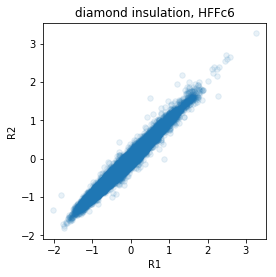

In [103]:
# plt.scatter(df1['val'],df2['val'],alpha=0.1,s=25,edgecolor='steelblue',facecolor='none')
plt.scatter(ds1['val'],ds2['val'],alpha=0.1,s=30)
ax = plt.gca()
ax.set_aspect(1)
fig = plt.gcf()
# ax.set_xlim([-1.75,0.1])
# ax.set_ylim([-1.75,0.1])
ax.set_title("diamond insulation, HFFc6")
ax.set_xlabel('R1')
ax.set_ylabel('R2')
fig.set_size_inches(4,4)


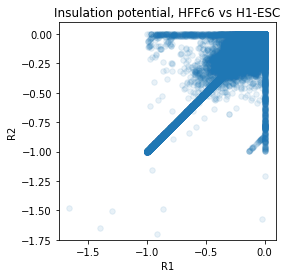

In [109]:
# plt.scatter(df1['val'],df2['val'],alpha=0.1,s=25,edgecolor='steelblue',facecolor='none')
plt.scatter(df2['val'],dt2['val'],alpha=0.1,s=30)
ax = plt.gca()
ax.set_aspect(1)
fig = plt.gcf()
ax.set_xlim([-1.75,0.1])
ax.set_ylim([-1.75,0.1])
ax.set_title("Insulation potential, HFFc6 vs H1-ESC")
ax.set_xlabel('R1')
ax.set_ylabel('R2')
fig.set_size_inches(4,4)


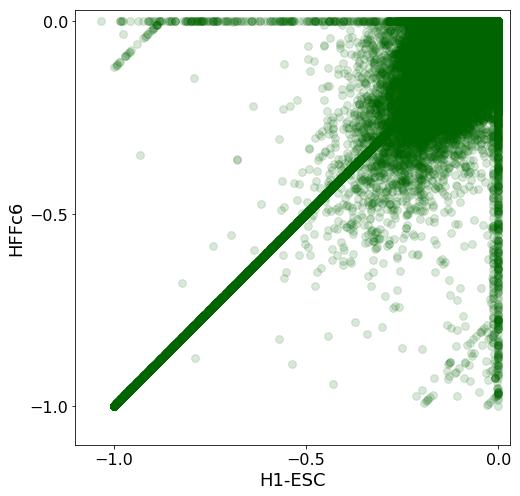

In [63]:
loc = plticker.MultipleLocator(base=.5) # this locator puts ticks at regular intervals

# plt.scatter(df1['val'],df2['val'],alpha=0.1,s=25,edgecolor='steelblue',facecolor='none')
plt.scatter(dt12['val'],df12['val'],alpha=0.15,s=60,color='darkgreen')
ax = plt.gca()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_aspect(1)
fig = plt.gcf()
ax.set_xlim([-1.1,0.03])
ax.set_ylim([-1.1,0.03])
# ax.set_title("Insulation potential, HFFc6")
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.set_xlabel('H1-ESC',fontsize=18)
ax.set_ylabel('HFFc6',fontsize=18)
fig.set_size_inches(8,8)




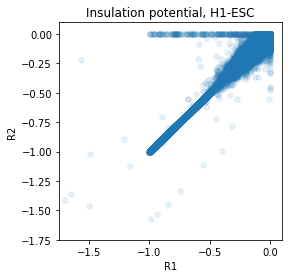

In [96]:
plt.scatter(dt2['val'],dt1['val'],alpha=0.1,s=30)
ax.set_aspect(1)
ax = plt.gca()
ax.set_xlim(-1.75,0.1)
ax.set_ylim(-1.75,0.1)
fig = plt.gcf()
ax.set_title("Insulation potential, H1-ESC")
ax.set_xlabel('R1')
ax.set_ylabel('R2')
fig.set_size_inches(4,4)
fig.set_size_inches(4,4)
# ax.set_xscale('log')
# ax.set_yscale('log')

### counting and intersecting insulated genomic regions for HFFc6

In [249]:
! wc -l $f1'.bed'
! wc -l $f2'.bed'
!bed_intersect_basewise.py $f1'.bed'  $f2'.bed' |wc -l
!wc -l $f12'.bed'

19891 U54-HFFc6-p17-FA-DpnII-20170327_hg38.inspot.tab.bed
21698 U54-HFFc6-p22-FA-DpnII-20170327_hg38.inspot.tab.bed
17701
21073 U54-HFFc6-p17-p22-FA-DpnII-20170327_hg38.inspot.tab.bed


### counting and intersecting insulated genomic regions for H1-ESC

In [250]:
! wc -l $t1'.bed'
! wc -l $t2'.bed'
!bed_intersect_basewise.py $t1'.bed'  $t2'.bed' |wc -l
!wc -l $t12'.bed'

24850 U54-ESC4DN-FA-DpnII-2017524-R1.inspot.tab.bed
25666 U54-ESC4DN-FA-DpnII-2017524-R2.inspot.tab.bed
23360
25177 U54-ESC4DN-FA-DpnII-2017524-R1-R2.inspot.tab.bed


### intersecting insulation between HFFc6 and H1-ESC

In [251]:
!bed_intersect_basewise.py $t12'.bed'  $f12'.bed' |wc -l

15483


In [248]:
17701/21698


0.8157894736842105

In [247]:
23360/25666

0.9101535104807917

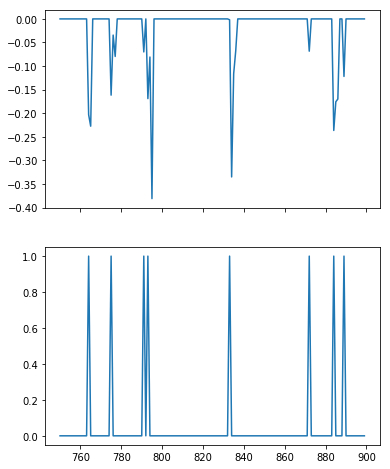

In [141]:
# for i in df[3][1013:1021]:
#     print(i<-0.0001)

start,stop = 750, 900


dfff = np.zeros_like(df[3])
dfff[rrr] = 1

# rrr_within = rrr[(rrr>=start)&(rrr<=stop)]
# print(rrr_within)
# print(np.ones_like(rrr_within))

f,axs = plt.subplots(nrows=2,sharex=True,figsize=(6,8))
ax1,ax2 = axs

x = df[3][start:stop].index

ax1.plot(x,df[3][start:stop])
ax2.plot(x,dfff[start:stop])


Text(0,0.5,'count')

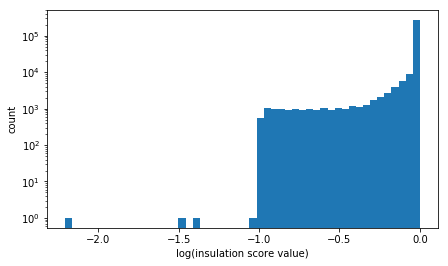

In [266]:
plt.hist(df1[3],log=1,bins=50)
fig = plt.gcf()
fig.set_size_inches(7,4)
ax = plt.gca()
ax.set_xlabel('log(insulation score value)')
ax.set_ylabel('count')

In [143]:
(rrr).size

19869

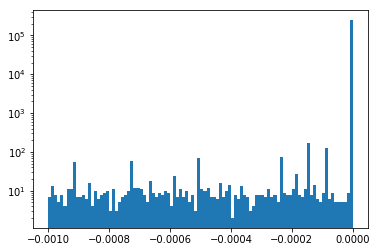

In [46]:
plt.hist(df[3][df[3]>-0.001],log=1,bins=100)
ax = plt.gca()
# ax.set_xscale('log')

In [64]:
find_runs(df[3])[1]

array([     0,      1,      2, ..., 308762, 308763, 308764])

In [113]:
aaa = [0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1]
find_nonzero_runs(aaa)

(array([ 3, 10, 19, 40]), array([ 4,  4, 10,  2]))

In [102]:
# cc[1:] - cc[:-1]
cc
cc[:-1]-cc[1:]

array([-1, -1, -1, -1, -5, -1, -1, -1])

In [100]:
y[3:12].sum()

5